### Índice
1. [Exclusão competitiva](#1)
2. [Coexistência em equilíbrio: nichos](#2)
3. [Não-linearidade relativa](#3)
4. [*Storage effect*](#4)

### <div id="1"> 1. Exclusão competitiva </div>

$$ \begin{aligned}
  \frac{1}{C_1}\frac{dC_1}{dt} &= f_1(R) - m_1\\
  \frac{1}{C_2}\frac{dC_2}{dt} &= f_2(R) - m_2\\
  \frac{dR}{dt} &= rR\left(1-\frac{R}{K}\right) - f_1(R)C_1 - f_2(R)C_2
\end{aligned} $$

Se as respostas funcionais $f_1$ e $f_2$ forem lineares (ou seja, $f_i = b_i R$), os nichos coincidem e não há coexistência possível. O caso linear corresponde à famosa regra do $R^*$ de Tilman:

$$ R^*_i = \frac{m_i}{b_i} ~,$$

onde $R^*_i$ é o valor de equilíbrio do recurso na presença do consumidor $i$ (chega-se a isso procurando pelo ponto de equilíbrio da equação diferencial de $C_i$: $dC_i/dt = 0$). Quando $R < R^*_i$, a taxa de crescimento de $C_i$ é negativa e ela decresce, portanto a espécie com menor $R^*$ é a melhor competidora.

<IPython.core.display.Javascript object>


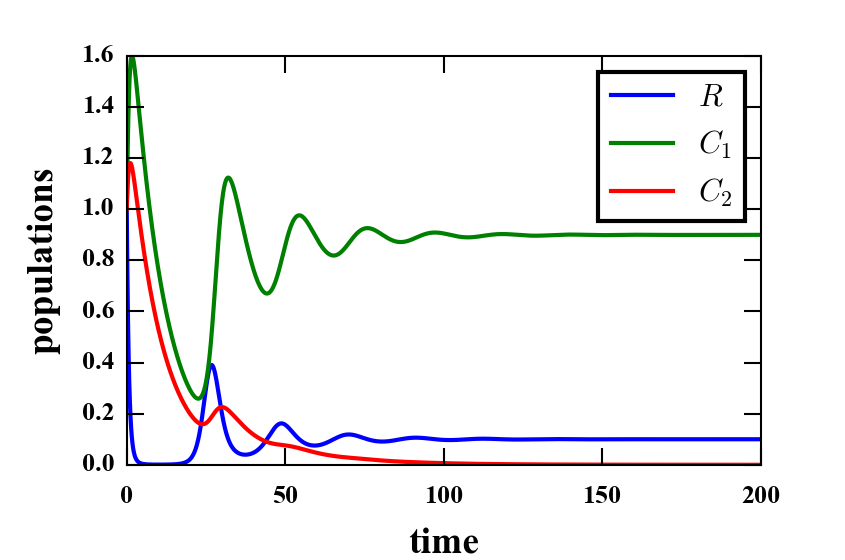

In [5]:
%matplotlib notebook
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *
ion()

def consumer_resource1(y, t, r, K, b1, m1, b2, m2):
    return array([ y[0] * (r*(1-y[0]/K) - b1*y[1] - b2*y[2]),
                   y[1] * (b1*y[0] - m1),
                   y[2] * (b2*y[0] - m2)])

t = arange(0, 200, .1)
y0 = [1, 1., 1.]
pars =  (1., 1., 1., 0.1, 0.5, 0.1)

y = odeint(consumer_resource1, y0, t, pars)
plot(t, y)
xlabel('tempo')
ylabel('populações')
legend(['$R$', '$C_1$', '$C_2$'])

<IPython.core.display.Javascript object>


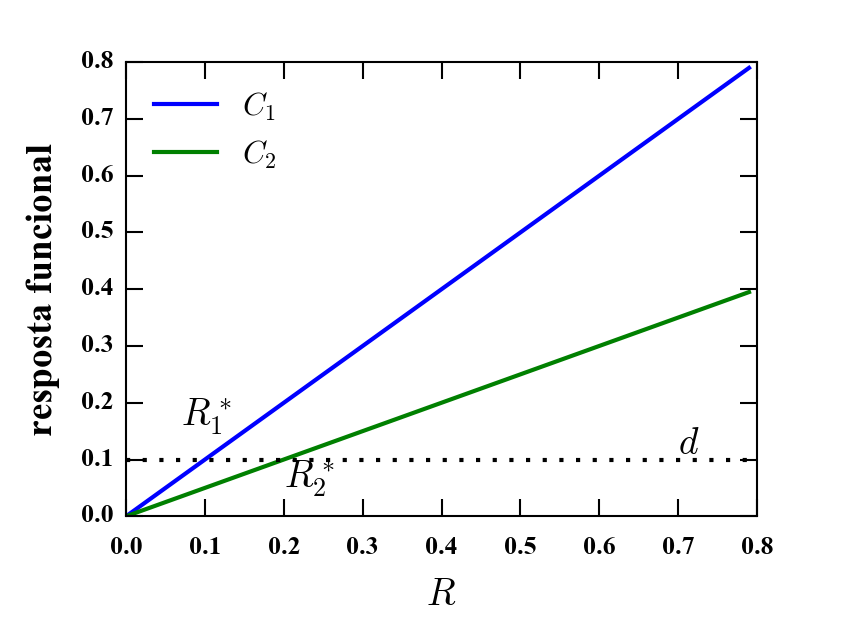

In [17]:
x = arange(0, 0.8, 0.01)

plot(x, 1.*x)
plot(x, 0.5*x)
legend(['$C_1$', '$C_2$'], frameon=False, loc='best')
axhline(0.1, c='k', ls=':')
xlabel('$R$')
ylabel('resposta funcional')
text(0.07, 0.16, '$R^*_1$')
text(0.2, 0.05, '$R^*_2$')
text(0.7, 0.11, '$d$')

### <div id="2">2. Coexistência em equilíbrio: nichos</div>

Para existir coexistência **em equilíbrio** é necessário que haja diferença de nicho entre as espécies, o que requer a introdução de novos ingredientes (e.g. recursos). Em geral, para que $n$ espécies coexistam (novamente, em equilíbrio!) são necessários no mínimo $n$ recursos.

Aqui vamos tomar um exemplo simples e assumir que exista um segundo recurso implícito (ou seja, não modelado diretamente) que limita o crescimento da melhor competidora.

* TODO: explicar sobreposição de nicho baseado em modelo com 2 recursos, com vetores de consumo, estilo Chesson 1990, e relacionar isso a fatores estabilizadores/equalizadores.

<IPython.core.display.Javascript object>


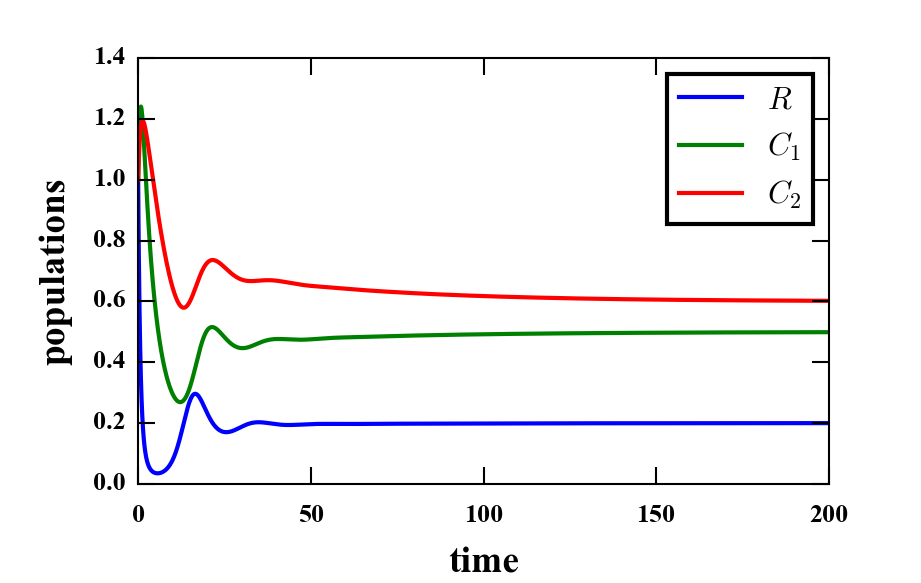

In [22]:
def consumer_resource2(y, t, r, K, b1, m1, b2, m2):
    return array([ y[0] * (r*(1-y[0]/K) - b1*y[1] - b2*y[2]),
                   y[1] * (b1*y[0] - m1) - 0.2*y[1]**2,
                   y[2] * (b2*y[0] - m2)])

pars =  (1., 1., 1., 0.1, 0.5, 0.1)

y = odeint(consumer_resource2, y0, t, pars)
plot(t, y)
xlabel('temop')
ylabel('populações')
legend(['$R$', '$C_1$', '$C_2$'])

### <div id="3">3. Não-linearidade relativa</div>

Agora vamos voltar ao modelo da [seção 1](#1), porém com uma modificação: faremos com que a resposta funcional da espécie 1 (a superior) seja não-linear, assumindo uma forma funcional de Holling tipo II:

$$ f_1(R) = \frac{b_1 R}{1+b_1 h R} ~,$$

em que $h$ é o chamado *tempo de manipulação* (handling time). Essa alteração tem 2 efeitos:
* dependendo do valor de $h$, é possível que o sistema de $R$ e $C_1$ (na ausência da espécie 2) exiba oscilações sustentadas - este modelo é conhecido exatamente por isto, e é chamado de modelo de Rosenzweig-MacArthur.
* para valores de $R$ grandes, a taxa de crescimento de $C_2$ pode superar a de $C_1$ (o que era impossível no modelo linear!), mesmo com $C_1$ ainda tendo o menor $R^*$ (ver gráfico abaixo).

A chamada "não-linearidade relativa" depende exatamente desse segundo fato: embora $$m_1 = m_2 = f_1(R^*) > f_2(R^*)$$ (no equilíbrio, a espécie 1 é superior, portanto $f_2 < m_2$ e a espécie 2 não invade), na presença de flutuações de $R(t)$, é possível que $$ \langle f_2(R(t)) \rangle > m_2 ~.$$ Isto se dá porque, no equilíbrio sem a espécie 2, $\langle f_1(R(t)) \rangle = m_1 (=m_2)$, mas pela não-linearidade, $\langle f_1(R(t)) \rangle < f_1(\langle R(t)\rangle)$, então $R(t)$ flutua ao redor de valores maiores que $R^*$. Se $\langle R\rangle \geq R^*_2$, então o consumidor 2 é capaz de invadir!

Este exemplo é bonitinho porque as oscilações não dependem de nenhum fator externo. O ponto principal, porém, é que as oscilações permitem que a espécie inferior tenha em média taxa de crescimento positivo mesmo que, no equilíbrio, ela tivesse crescimento negativo (extinção). A origem das oscilações poderia ser qualquer outro, como sazonalidade, perturbações ambientais, acoplamento com outras espécies etc.

<IPython.core.display.Javascript object>


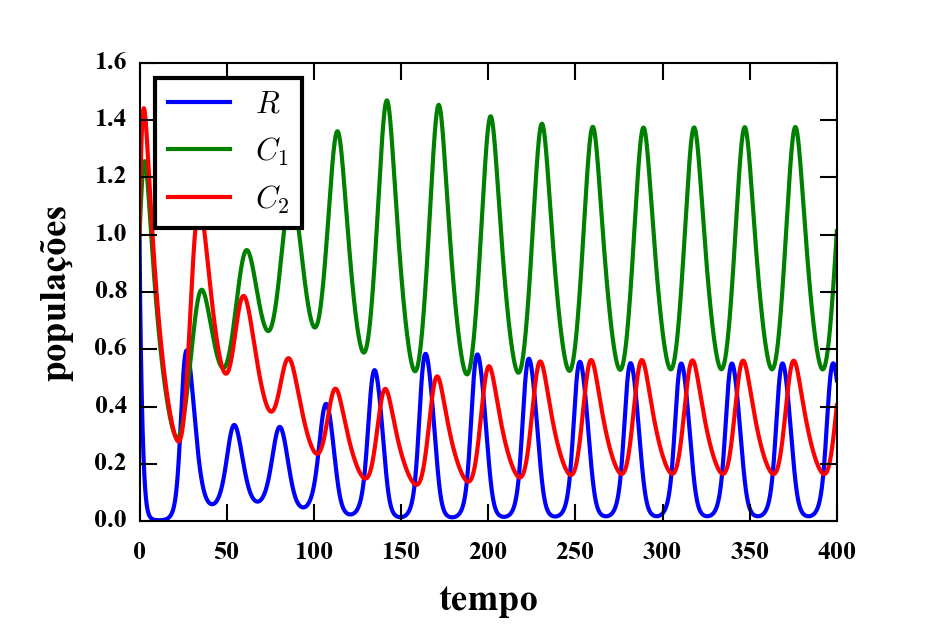

média de R (últimos T-200): 0.20


In [52]:
def consumer_resource3(y, t, r, K, b1, m1, h1, b2, m2):
    return array([ y[0] * (r*(1-y[0]/K) - b1*y[1]/(1+b1*h1*y[0]) - b2*y[2]),
                   y[1] * (b1*y[0]/(1+b1*h1*y[0]) - m1),
                   y[2] * (b2*y[0] - m2)])

t = arange(0, 400, .1)
# note que os outros parâmetros não foram alterados!
pars =  (1., 1., 1., 0.1, 3., 0.5, 0.1)

y = odeint(consumer_resource3, y0, t, pars)
plot(t, y)
xlabel('tempo')
ylabel('populações')
legend(['$R$', '$C_1$', '$C_2$'], loc='upper left')
print('média de R (últimos T-200): %.2f' % y[-2000:,0].mean())

<IPython.core.display.Javascript object>


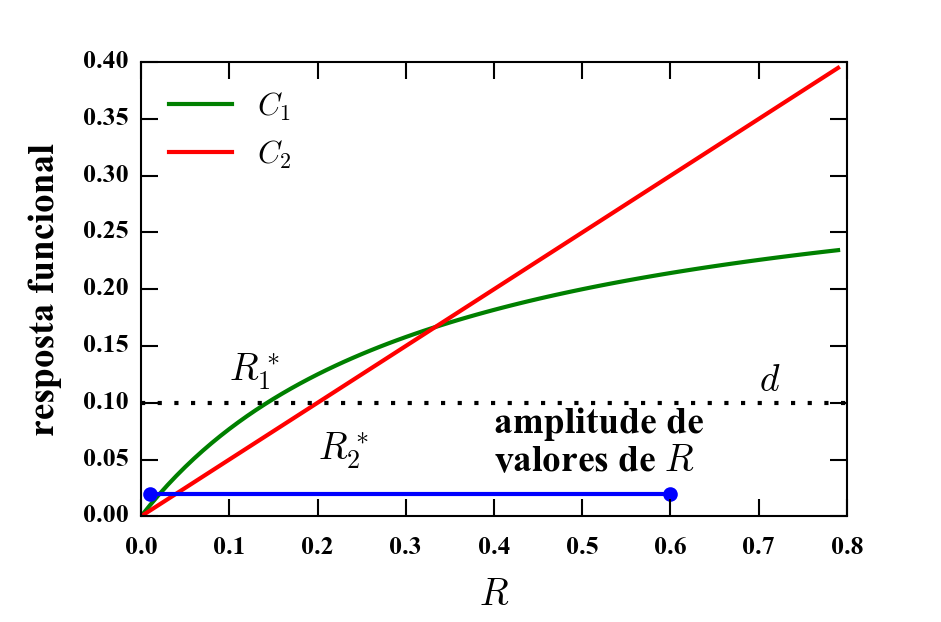

In [47]:
x = arange(0, 0.8, 0.01)

plot(x, 1.*x/(1+3*x), 'g')
plot(x, 0.5*x, 'r')
legend(['$C_1$', '$C_2$'], frameon=False, loc='best')
axhline(0.1, c='k', ls=':')
xlabel('$R$')
ylabel('resposta funcional')
text(0.1, 0.12, '$R^*_1$')
text(0.2, 0.05, '$R^*_2$')
text(0.7, 0.11, '$d$')
plot([0.01, 0.6], 2*[0.02], '.-b')
text(0.4, 0.04, "amplitude de\nvalores de $R$")

### <div id="4">4. Storage effect</div>

TODO